<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/Behaviour_cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!git clone https://github.com/kiran20v/python/

fatal: destination path 'python' already exists and is not an empty directory.


In [98]:
!ls python/track_self_drive

driving_log.csv  IMG


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from  sklearn.utils import shuffle
from  sklearn.model_selection import train_test_split

import cv2
import pandas as pd
import ntpath
import random

In [100]:
datadir = 'python/track_self_drive'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_47_904.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_47_904.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_47_904.jpg,0.0,0.0,0.0,0.000079
1,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_005.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_005.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_005.jpg,0.0,0.0,0.0,0.000079
2,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_105.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_105.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_105.jpg,0.0,0.0,0.0,0.000079
3,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_207.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_207.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_207.jpg,0.0,0.0,0.0,0.000079
4,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_307.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_307.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_307.jpg,0.0,0.0,0.0,0.000079


In [101]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_12_10_01_36_47_904.jpg,left_2019_12_10_01_36_47_904.jpg,right_2019_12_10_01_36_47_904.jpg,0.0,0.0,0.0,0.000079
1,center_2019_12_10_01_36_48_005.jpg,left_2019_12_10_01_36_48_005.jpg,right_2019_12_10_01_36_48_005.jpg,0.0,0.0,0.0,0.000079
2,center_2019_12_10_01_36_48_105.jpg,left_2019_12_10_01_36_48_105.jpg,right_2019_12_10_01_36_48_105.jpg,0.0,0.0,0.0,0.000079
3,center_2019_12_10_01_36_48_207.jpg,left_2019_12_10_01_36_48_207.jpg,right_2019_12_10_01_36_48_207.jpg,0.0,0.0,0.0,0.000079
4,center_2019_12_10_01_36_48_307.jpg,left_2019_12_10_01_36_48_307.jpg,right_2019_12_10_01_36_48_307.jpg,0.0,0.0,0.0,0.000079


[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


-1.0

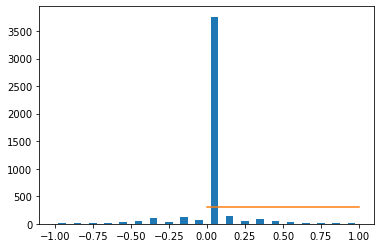

In [102]:
num_bins = 20
samples_per_bin = 300
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering']),(samples_per_bin, samples_per_bin))
np.min(data['steering'])

In [103]:
print('total data: ', len(data))
remove_list = []
for j in range(num_bins):
    bin_list = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            bin_list.append(i)
    bin_list = shuffle(bin_list)
    bin_list = bin_list[samples_per_bin:]
    remove_list.extend(bin_list)

print('removed',len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining: ', len(data))

total data:  4633
removed 6912
remaining:  835


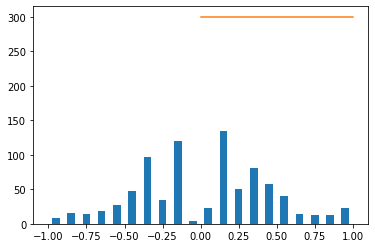

In [104]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering']),(samples_per_bin, samples_per_bin))

In [0]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right, = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [106]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training samples: ',X_train, X_valid, y_train, y_valid);

Training samples:  ['python/track_self_drive/IMG/center_2019_12_10_01_38_13_825.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_42_00_380.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_37_27_949.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_39_52_261.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_44_32_398.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_42_03_503.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_04_651.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_07_487.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_36_751.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_40_57_167.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_43_19_732.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_44_28_968.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_37_18_630.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_45_28_775.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_44_11_

Text(0.5, 1.0, 'Validation set')

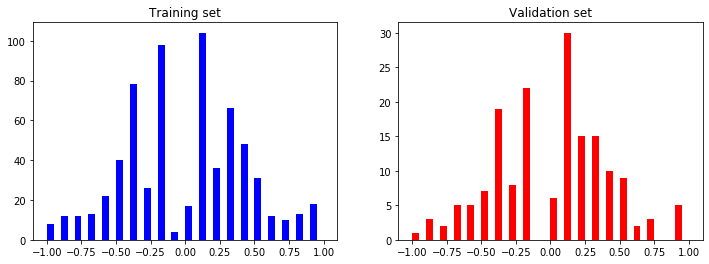

In [107]:
fig,axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(y_train, bins=num_bins, width = 0.05, color='blue')
axs[0].set_title('Training set')
axs[1].hist(y_valid, bins=num_bins, width = 0.05, color='red')
axs[1].set_title('Validation set')

In [0]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135, :, :] # strip top and bottom
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0) # 3x3 Kernal, 0-deviation
    img = cv2.resize(img, (200, 66)) # 200x66 - Matches NVIDEA
    img = img / 255
    return img

Text(0.5, 1.0, 'preprocessed image')

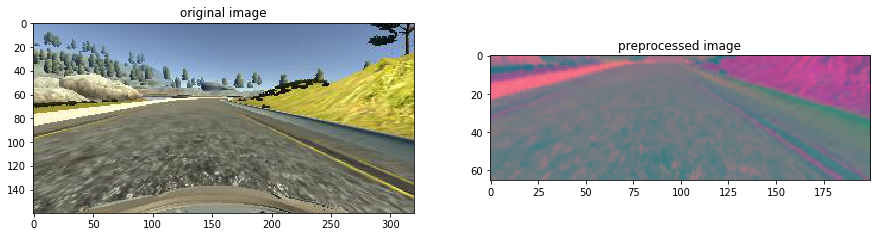

In [109]:
image_path = image_paths[100]
original_image = mpimg.imread(image_path)
preprocessed_image = img_preprocess(image_path)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprocessed image')

In [0]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(668, 66, 200, 3)


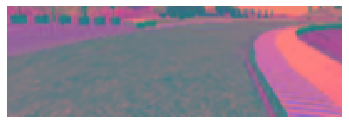

In [111]:
plt.imshow(X_train[random.randint(0, len(X_train) -1 )])
plt.axis('off')
print(X_train.shape)

In [0]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, 5, 5, subsample=(2,2), input_shape=(66, 200, 3), activation='relu'))
    model.add(Conv2D(36, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Conv2D(48, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Conv2D(64, 3, 3, activation='elu'))
    model.add(Conv2D(64, 3, 3, activation='elu'))
    model.add(Dropout(0.5))
   
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dropout(0.5))
   
    model.add(Dense(50, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(lr=1e-3))
    return model

In [123]:
model = nvidia_model()
print(model.summary)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), ac

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f4b88196438>>


In [124]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Train on 668 samples, validate on 167 samples
Epoch 1/30
668/668 [==============================] - 1s 2ms/step - loss: 2.2626 - val_loss: 0.2970
Epoch 2/30
668/668 [==============================] - 0s 358us/step - loss: 0.5774 - val_loss: 0.2280
Epoch 3/30
668/668 [==============================] - 0s 350us/step - loss: 0.3206 - val_loss: 0.1787
Epoch 4/30
668/668 [==============================] - 0s 350us/step - loss: 0.2248 - val_loss: 0.1606
Epoch 5/30
668/668 [==============================] - 0s 338us/step - loss: 0.2103 - val_loss: 0.1609
Epoch 6/30
668/668 [==============================] - 0s 385us/step - loss: 0.1962 - val_loss: 0.1558
Epoch 7/30
668/668 [==============================] - 0s 359us/step - loss: 0.1794 - val_loss: 0.1533
Epoch 8/30
668/668 [==============================] - 0s 350us/step - loss: 0.1832 - val_loss: 0.1500
Epoch 9/30
668/668 [==============================] - 0s 336us/step - loss: 0.1815 - val_loss: 0.1458
Epoch 10/30
668/668 [=================

Text(0.5, 1.0, 'loss')

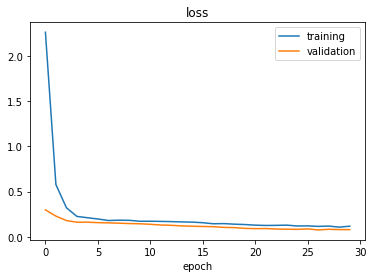

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.title('loss')

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')